In [361]:
# Importing the Required Modules : 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

from sklearn.model_selection import train_test_split , RandomizedSearchCV , GridSearchCV
from sklearn.feature_selection import f_regression

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor , RandomForestRegressor

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [362]:
cust_demog = pd.read_excel("CustomerDemographics.xlsx")
cust_behavior = pd.read_excel("CustomerBehaviorData.xlsx")
credit_consumption = pd.read_excel("CreditConsumptionData.xlsx")

In [363]:
cust_demog.dropna(inplace=True)

In [364]:
cust_behavior.dropna(inplace=True)

In [365]:
cust_demog.isna().sum()

ID                              0
account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
dtype: int64

In [366]:
cust_behavior.isna().sum()

ID                       0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     0
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
l

In [367]:
credit_consumption.isna().sum()

ID            0
cc_cons    5000
dtype: int64

In [368]:
cust_demog.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0


In [369]:
cust_behavior.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,...,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,...,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,...,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,...,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,...,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89


In [370]:
credit_consumption.head()

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0


In [371]:
def outlier_treat(x):
  if ((x.dtype=='int64') | (x.dtype=='float64')):
    x=x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99))
  return x
cust_behavior=cust_behavior.apply(outlier_treat)

In [372]:
def outlier_treat(x):
  if ((x.dtype=='int64') | (x.dtype=='float64')):
    x=x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99))
  return x
cust_demog=cust_demog.apply(outlier_treat)

# Data Audit

In [373]:
# Merging all the datasets

df = cust_demog.merge(cust_behavior.merge(credit_consumption,how='inner',on='ID'),how='inner',on='ID')

In [374]:
df

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427.0,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150.0,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749.0,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635.0,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908.0,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19583,1270.0,current,F,66,MEDIUM,32.2,6,354.0,1,7.0,...,8,24438.0,153772.21,31284.00,3,38,42872.0,Y,6334.20,NaN
19584,15992.0,current,M,53,MEDIUM,19.8,5,809.0,0,14.0,...,11,213000.0,18098.47,93108.00,43,11,36747.0,Y,102216.02,NaN
19585,7081.0,current,F,66,MEDIUM,18.4,1,466.0,0,10.0,...,171,34327.0,32198.63,46800.00,3,38,18810.0,Y,1930.19,NaN
19586,6821.0,current,M,32,LOW,6.0,8,619.0,0,17.0,...,82,51929.0,27334.14,20201.00,47,80,11443.0,Y,24499.91,NaN


In [375]:
#these are constant features so doesn't provide any useful information for the machine learning model
columns_to_drop=['ID','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq']

In [376]:
df=df.drop(columns=columns_to_drop)

In [377]:
df["investment"]= df[['investment_1','investment_2','investment_3','investment_4']].sum(axis=1)

In [378]:
df['cc_cons_old'] = df[['cc_cons_apr', 'cc_cons_may','cc_cons_jun']].mean(axis=1)
df['dc_cons'] = df[['dc_cons_apr', 'dc_cons_may','dc_cons_jun']].mean(axis=1)
df['cc_count'] = df[['cc_count_apr', 'cc_count_may','cc_count_jun']].mean(axis=1)
df['dc_count'] = df[['dc_count_apr', 'dc_count_may','dc_count_jun']].mean(axis=1)
df['debit_amount'] = df[['debit_amount_apr', 'debit_amount_may','debit_amount_jun']].mean(axis=1)
df['credit_amount'] = df[['credit_amount_apr', 'credit_amount_may','credit_amount_jun']].mean(axis=1)
df['max_credit_amount'] = df[['max_credit_amount_apr', 'max_credit_amount_may','max_credit_amount_jun']].mean(axis=1)
df['debit_count'] = df[['debit_count_apr', 'debit_count_may','debit_count_jun']].mean(axis=1)
df['credit_count'] = df[['credit_count_apr', 'credit_count_may','credit_count_jun']].mean(axis=1)

In [379]:
cols_to_delete_1 = ['investment_1','investment_2','investment_3','investment_4','cc_cons_apr', 'cc_cons_may','cc_cons_jun',
                    'dc_cons_apr', 'dc_cons_may','dc_cons_jun','cc_count_apr', 'cc_count_may','cc_count_jun',
                    'dc_count_apr', 'dc_count_may','dc_count_jun','debit_amount_apr', 'debit_amount_may','debit_amount_jun',
                    'credit_amount_apr', 'credit_amount_may','credit_amount_jun',
                    'max_credit_amount_apr', 'max_credit_amount_may','max_credit_amount_jun','debit_count_apr',
                    'debit_count_may','debit_count_jun','credit_count_apr', 'credit_count_may','credit_count_jun']

In [380]:
df.drop(cols_to_delete_1, axis = 1, inplace = True)

In [381]:
#this is also constant feature
df=df.drop(columns=['Emp_Tenure_Years'])

In [382]:
df.head()

,account_type,gender,age,Income,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,card_lim,emi_active,...,investment,cc_cons_old,dc_cons,cc_count,dc_count,debit_amount,credit_amount,max_credit_amount,debit_count,credit_count
0,current,M,63,MEDIUM,10,628.0,1,5.0,519000,2646.72,...,114544.00,8144.430000,2764.193333,14.666667,26.666667,77210.640000,158506.250000,38330.666667,57.666667,15.333333
1,current,M,36,MEDIUM,10,656.0,0,12.0,402000,5469.79,...,1143923.70,11966.243333,4638.666667,19.333333,18.000000,70207.263333,165532.506667,42800.000000,28.333333,4.000000
2,current,F,28,MEDIUM,10,314.0,1,13.0,114000,7207.85,...,281087.60,11324.663333,23829.766667,28.666667,24.666667,93883.763333,36822.000000,143985.666667,59.666667,18.333333
3,current,M,32,MEDIUM,2,614.0,1,19.0,298000,591.34,...,205434.25,7639.770000,5844.726667,52.000000,2.000000,27502.776667,112150.116667,71727.333333,40.000000,3.666667
4,current,M,32,HIGH,7,750.0,1,18.0,381000,2621.39,...,140601.15,12805.913333,11433.620000,41.000000,66.000000,96428.630000,56274.666667,36203.346667,83.333333,8.333333


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19588 entries, 0 to 19587
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   account_type                  19588 non-null  object 
 1   gender                        19588 non-null  object 
 2   age                           19588 non-null  int64  
 3   Income                        19588 non-null  object 
 4   Tenure_with_Bank              19588 non-null  int64  
 5   region_code                   19588 non-null  float64
 6   NetBanking_Flag               19588 non-null  int64  
 7   Avg_days_between_transaction  19588 non-null  float64
 8   card_lim                      19588 non-null  int64  
 9   emi_active                    19588 non-null  float64
 10  cc_cons                       14707 non-null  float64
 11  investment                    19588 non-null  float64
 12  cc_cons_old                   19588 non-null  float64
 13  d

In [384]:
# converting region_code column to string

df.region_code = df.region_code.astype("O")

In [385]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Income'] = le.fit_transform(df['Income'])
df['account_type'] = le.fit_transform(df['account_type'])
df['gender'] = le.fit_transform(df['gender'])

In [386]:
df_conti = df.select_dtypes(['int','float'])
df_cat = df.select_dtypes('object')

In [387]:
# UDF for calculating various statistics and outlier thresholds

def continuous_var_summary( x ):
    
    # frequency and missings values
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers -> using IQR method
    q1 = x.quantile(0.01)
    q3 = x.quantile(0.99)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var', 'lc_iqr', 'uc_iqr', 'min', 'p1',
                             'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max'])

In [388]:
df_conti.apply(continuous_var_summary)

,account_type,gender,age,Income,Tenure_with_Bank,NetBanking_Flag,Avg_days_between_transaction,card_lim,emi_active,cc_cons,investment,cc_cons_old,dc_cons,cc_count,dc_count,debit_amount,credit_amount,max_credit_amount,debit_count,credit_count
dtype,int32,int32,int64,int32,int64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,2,2,41,3,10,2,19,301,5793,12063,19577,19571,19377,475,202,19581,19514,18969,363,193
n_tot,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588
n,19588,19588,19588,19588,19588,19588,19588,19588,19588,14707,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588
nmiss,0,0,0,0,0,0,0,0,0,4881,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.918317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,3014,16921,934331,30509,107631,14056,216455.0,5439456356,197899899.19,810242946.0,14688914514.996681,290570447.236933,141240063.8708,735412.666667,401464.666667,1297353151.024933,1460726628.1412,960265706.206667,794753.333333,281002.0
mean,0.15387,0.863845,47.699153,1.557535,5.494742,0.717582,11.050388,277693.299775,10103.119215,55092.333311,749893.53252,14834.104923,7210.540324,37.544041,20.495439,66232.037524,74572.525431,49023.162457,40.57348,14.34562
std,0.360833,0.342962,30.37862,0.639095,2.868757,0.450187,5.479422,178916.317788,21303.979346,97592.383364,1738883.056027,11001.651226,6058.762755,35.884703,12.911436,44344.068848,50096.670843,33442.36048,20.785162,11.354205
var,0.1302,0.117623,922.860576,0.408442,8.229768,0.202668,30.02406,32011048770.696457,453859535.956997,9524273290.632986,3023714282539.086914,121036329.70605,36708606.124062,1287.711912,166.705169,1966396442.035617,2509676429.583589,1118391474.46076,432.022958,128.917964


In [389]:
# removing outliers using iqr method
col_by_box=['cc_cons', 'emi_active',  'age', 'investment', 'cc_cons_old',
       'dc_cons', 'cc_count', 'dc_count', 'debit_amount', 'credit_amount',
       'max_credit_amount', 'debit_count', 'credit_count']

In [390]:
# Function to treat outliers using IQR method
def treat_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the lower/upper bound
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Iterate through each column and treat outliers
for col in df_conti.columns:
    treat_outliers_iqr(df_conti, df_conti.columns)

In [391]:
df_conti.apply(continuous_var_summary)

,account_type,gender,age,Income,Tenure_with_Bank,NetBanking_Flag,Avg_days_between_transaction,card_lim,emi_active,cc_cons,investment,cc_cons_old,dc_cons,cc_count,dc_count,debit_amount,credit_amount,max_credit_amount,debit_count,credit_count
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,1,1,36,3,10,2,19,301,5303,9012,17229,18444,17972,250,172,18313,18273,17520,281,123
n_tot,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588
n,19588,19588,19588,19588,19588,19588,19588,19588,19588,14707,19588,19588,19588,19588,19588,19588,19588,19588,19588,19588
nmiss,0,0,0,0,0,0,0,0,0,4881,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.918317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,0.0,19588.0,863369.0,30509.0,107631.0,14056.0,216455.0,5439456356.0,126985088.742,250571753.0,8431031067.47386,279111833.920267,132190280.105967,653708.666667,401136.333333,1244260417.337733,1404164356.661867,906645510.251667,791743.833333,276246.166667
mean,0.0,1.0,44.076424,1.557535,5.494742,0.717582,11.050388,277693.299775,6482.80012,17037.584348,430418.167627,14249.123643,6748.533802,33.372915,20.478677,63521.565108,71684.927336,46285.762214,40.41984,14.102827
std,0.0,0.0,14.118171,0.639095,2.868757,0.450187,5.479422,178916.317788,6537.796773,13387.683089,394164.178579,9265.744994,4702.893909,19.853589,12.858413,36463.354441,41631.263464,25454.72911,20.314338,10.63172
var,0.0,0.0,199.322744,0.408442,8.229768,0.202668,30.02406,32011048770.696457,42742786.648439,179230058.503067,155365399674.533264,85854030.293012,22117211.122641,394.164981,165.338784,1329576217.069665,1733162097.646874,647943234.084683,412.672319,113.033473


In [392]:
df = pd.concat([df_conti,df_cat],axis=1).reset_index(drop=True)

In [393]:
df.head()

,account_type,gender,age,Income,Tenure_with_Bank,NetBanking_Flag,Avg_days_between_transaction,card_lim,emi_active,cc_cons,...,cc_cons_old,dc_cons,cc_count,dc_count,debit_amount,credit_amount,max_credit_amount,debit_count,credit_count,region_code
0,0.0,1.0,63.0,2.0,10.0,1.0,5.0,519000.0,2646.72,NaN,...,8144.430000,2764.193333,14.666667,26.666667,77210.640000,158506.250000,38330.666667,57.666667,15.333333,628.0
1,0.0,1.0,36.0,2.0,10.0,0.0,12.0,402000.0,5469.79,NaN,...,11966.243333,4638.666667,19.333333,18.000000,70207.263333,165532.506667,42800.000000,28.333333,4.000000,656.0
2,0.0,1.0,28.0,2.0,10.0,1.0,13.0,114000.0,7207.85,NaN,...,11324.663333,17630.924167,28.666667,24.666667,93883.763333,36822.000000,104910.487500,59.666667,18.333333,314.0
3,0.0,1.0,32.0,2.0,2.0,1.0,19.0,298000.0,591.34,NaN,...,7639.770000,5844.726667,52.000000,2.000000,27502.776667,112150.116667,71727.333333,40.000000,3.666667,614.0
4,0.0,1.0,32.0,0.0,7.0,1.0,18.0,381000.0,2621.39,NaN,...,12805.913333,11433.620000,41.000000,58.000000,96428.630000,56274.666667,36203.346667,83.333333,8.333333,750.0


In [394]:
df['region_code'] = df.region_code.astype('float')

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19588 entries, 0 to 19587
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   account_type                  19588 non-null  float64
 1   gender                        19588 non-null  float64
 2   age                           19588 non-null  float64
 3   Income                        19588 non-null  float64
 4   Tenure_with_Bank              19588 non-null  float64
 5   NetBanking_Flag               19588 non-null  float64
 6   Avg_days_between_transaction  19588 non-null  float64
 7   card_lim                      19588 non-null  float64
 8   emi_active                    19588 non-null  float64
 9   cc_cons                       14707 non-null  float64
 10  investment                    19588 non-null  float64
 11  cc_cons_old                   19588 non-null  float64
 12  dc_cons                       19588 non-null  float64
 13  c

In [396]:
df_new = df[df.cc_cons.isnull()]
df = df[df.cc_cons.notna()]

In [397]:
df.isna().sum()

account_type                    0
gender                          0
age                             0
Income                          0
Tenure_with_Bank                0
NetBanking_Flag                 0
Avg_days_between_transaction    0
card_lim                        0
emi_active                      0
cc_cons                         0
investment                      0
cc_cons_old                     0
dc_cons                         0
cc_count                        0
dc_count                        0
debit_amount                    0
credit_amount                   0
max_credit_amount               0
debit_count                     0
credit_count                    0
region_code                     0
dtype: int64

In [398]:
df = df.apply(lambda x : x.fillna(x.mean()))

In [399]:
df.isna().sum()

account_type                    0
gender                          0
age                             0
Income                          0
Tenure_with_Bank                0
NetBanking_Flag                 0
Avg_days_between_transaction    0
card_lim                        0
emi_active                      0
cc_cons                         0
investment                      0
cc_cons_old                     0
dc_cons                         0
cc_count                        0
dc_count                        0
debit_amount                    0
credit_amount                   0
max_credit_amount               0
debit_count                     0
credit_count                    0
region_code                     0
dtype: int64

[]

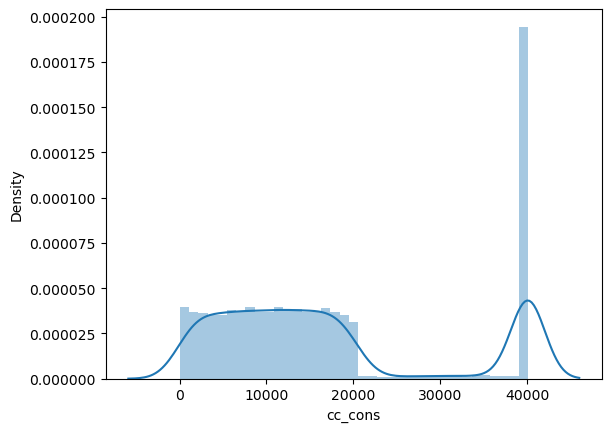

In [400]:
sns.distplot(df.cc_cons)
plt.plot()

In [401]:
df.skew()

account_type                    0.000000
gender                          0.000000
age                             0.878254
Income                         -1.153154
Tenure_with_Bank               -0.001962
NetBanking_Flag                -0.974044
Avg_days_between_transaction   -0.006943
card_lim                        0.372448
emi_active                      1.156854
cc_cons                         0.785434
investment                      1.094820
cc_cons_old                     0.979274
dc_cons                         1.031379
cc_count                        0.793130
dc_count                        0.533356
debit_amount                    0.978564
credit_amount                   0.964946
max_credit_amount               1.013362
debit_count                     0.542325
credit_count                    0.961266
region_code                    -0.095316
dtype: float64

In [402]:
train_x,test_x,train_y,test_y=train_test_split(df[df.columns.difference(['cc_cons'])],
                                              df['cc_cons'],
                                              test_size=0.2,
                                              random_state=12)

In [403]:
param_grid={'n_estimators':np.arange(5,25)}

tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=2)

tree.fit(train_x,train_y) 

GridSearchCV(cv=2, estimator=RandomForestRegressor(warm_start=True),
             param_grid={'n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24])})

In [404]:
tree.best_params_ 

{'n_estimators': 24}

In [405]:
radm_clf = RandomForestRegressor(oob_score=False,n_estimators=24,max_depth=None)
radm_clf.fit( train_x, train_y)

RandomForestRegressor(n_estimators=24)

In [406]:
pred_y = radm_clf.predict(test_x)

In [407]:
df1 = pd.DataFrame({'Real Values':test_y, 'Predicted Values':pred_y})
df1

,Real Values,Predicted Values
10616,11355.0,18993.208333
11019,17297.0,14976.666667
14201,15166.0,18920.458333
1813,8498.0,20338.958333
5854,3301.0,19471.000000
...,...,...
5863,2156.0,14662.375000
5104,26262.0,18179.666667
7964,7021.0,21671.208333
10202,40086.0,15562.958333


In [408]:
errors = abs((pred_y - test_y)/test_y)
print('Mean Absolute Percentage Error:', round(np.mean(errors), 5)) 

Mean Absolute Percentage Error: 5.26666


In [409]:
rmspe = np.sqrt(np.mean(np.square(((test_y - pred_y) / test_y)), axis=0))
print('Root Mean Squared Percentage Error (RMSPE)::', rmspe)

Root Mean Squared Percentage Error (RMSPE):: 41.64276283570607


In [410]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, pred_y))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_y, pred_y))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_y, pred_y, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_y, pred_y))
print('Explained Variance Score:', metrics.explained_variance_score(test_y, pred_y))
print('Max Error:', metrics.max_error(test_y, pred_y))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(test_y, pred_y))
print('Median Absolute Error:', metrics.median_absolute_error(test_y, pred_y))
print('R^2:', metrics.r2_score(test_y, pred_y))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(test_y, pred_y))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(test_y, pred_y))

Mean Absolute Error (MAE): 11460.573051212328
Mean Squared Error (MSE): 194114884.37802613
Root Mean Squared Error (RMSE): 13932.511775628474
Mean Absolute Percentage Error (MAPE): 5.2666583741655755
Explained Variance Score: -0.06477434834579632
Max Error: 30813.875
Mean Squared Log Error: 1.541404999857227
Median Absolute Error: 10278.583333333332
R^2: -0.06569897344581999
Mean Poisson Deviance: 11250.373845593427
Mean Gamma Deviance: 0.9186706335410556


In [411]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)

In [412]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 89.74 %.


## TEST ON NEW DATASETS "CREDIT_SPEND_NEW

In [413]:
df_new['cc_cons'] = radm_clf.predict(df_new[df_new.columns.difference(['cc_cons'])])

In [414]:
df_new.cc_cons

0        21503.291667
1        18519.750000
2        15624.708333
3        20074.541667
4        17569.000000
             ...     
19583    15124.625000
19584    13910.583333
19585    13256.666667
19586    19707.083333
19587    22888.291667
Name: cc_cons, Length: 4881, dtype: float64